In [2]:
# in order to clssify music by their genre, we must transform the data into something a machine can understand
# https://librosa.org/doc/latest/index.html
# https://www.kdnuggets.com/2020/02/audio-data-analysis-deep-learning-python-part-1.html
# source music files https://www.kaggle.com/andradaolteanu/gtzan-dataset-music-genre-classification

# READ: ->>>> make sure to connect the shared drive to the resource folders

# since this process takes time, we will be exporting the resulting data to a json file
# so that we can just load that to the next step instead of repeating this step every time.

import librosa
import json
import numpy
import os
import math
import pandas as pd

# sample rate for sound files, given librosa
sr = 22050  
hop = 512
nfft = 2048
n = 13

# dict for data
dataset = {
    'genre': [],  # label to genre: rock -> 0, folk -> 1 etc..
    'mfcc': [],  # storing the mel data of each track
    'class': []  # actual labels for each mfcc
}

# dict for extended dataset
dataset = {
    'genre': [],  # label to genre: rock -> 0, folk -> 1 etc..
    'mfcc': [],  # storing the mel data of each track
    'class': []  # actual labels for each mfcc
}

In [4]:
data = '/content/drive/MyDrive/Colab Notebooks/CS412 Final - Music Classification/genres_original'
# the json file name should be n_segments.json where n is the number of segments for the dataset
json_dir = '/content/drive/MyDrive/Colab Notebooks/CS412 Final - Music Classification/6_segments.json'
track_time = 30
segments = 6

# samples for each segment will be used to crop the tracks into smaller parts
samples_for_segment = int((sr * track_time) / segments)  # sample rate for 30s / segments

In [5]:
# This will take a while as we have to process all the 1000 music files, 
# split them into segments and retrive mfcc for each. Estimated time 2:30 minutes
# for all files within data
c = 0
for e, (path, folder, file) in enumerate(os.walk(data)):
    # must be in a subfolder
    if path is not data:
        # get the genre from the folder
        c += 1
        collect_genre = path.split('/')[-1] # split the path into two parts, get the name of the folder which indicates the genre of the files it holds
        dataset['genre'].append(collect_genre) # append the genres into the dictionary's list -> we get dataset['genre'] = [rock, metal, pop, jazz etc.]
        print('Working on',collect_genre)
        # go through all the files and collect them
        for song in file:
            # load song to librosa for processing
            path_local = os.path.join(path, song) # add the original path + song name as final path for this file
            signal, sample_rate = librosa.load(path_local, sr=sr) # get signal and sample rate from librosa

            # split the files into smaller segments for more data
            for s in range(segments):
                start = s * samples_for_segment
                end = start + samples_for_segment
                # get mfcc of each segment
                mfcc = librosa.feature.mfcc(signal[start:end], sr=sr, n_fft=nfft, n_mfcc=n, hop_length=hop)
                mfcc = mfcc.T   # reshape

                check = math.ceil(samples_for_segment/hop) # a check flag to insure homogeneus segments
                if len(mfcc) == check:
                    dataset['mfcc'].append(mfcc.tolist()) # collect mfcc data and class label
                    dataset['class'].append(e-1)
                    #print('Type:', collect_genre, 'Segment:', s+1)
    print('Completed:',c,'/10')

Completed: 0 /10
Working on metal
Completed: 1 /10
Working on classical
Completed: 2 /10
Working on blues
Completed: 3 /10
Working on hiphop
Completed: 4 /10
Working on disco
Completed: 5 /10
Working on pop
Completed: 6 /10
Working on country
Completed: 7 /10
Working on jazz
Completed: 8 /10
Working on rock
Completed: 9 /10
Working on reggae
Completed: 10 /10


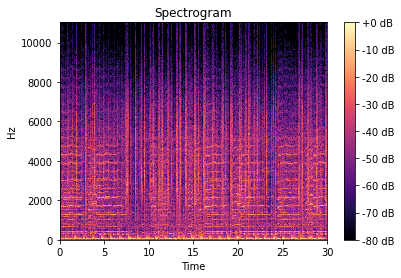

In [12]:
# spectrogram of the last signal processed
import numpy as np
import matplotlib.pyplot as plt
import librosa.display
D = librosa.stft(signal)  # STFT of y
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

fig, ax = plt.subplots()
img = librosa.display.specshow(S_db, x_axis='time', y_axis='linear', ax=ax)
ax.set(title='Spectrogram')
fig.colorbar(img, ax=ax, format="%+2.f dB")

In [ ]:
# export to json
# estimated time 1 min
with open(json_dir, 'w') as j:
    json.dump(dataset, j, indent=2)

For models different than CNN, according to the paper "Music Genre Classification using Machine Learning Techniques", more features are needed. Therefore, an extended dataset is needed. 

In [ ]:
# This will take a while as we have to process all the 1000 music files, 
# split them into segments and retrive mfcc for each. Estimated time 2:30 minutes
# for all files within data
c = 0

header = ['filename', 'chroma_stft', 'rmse', 'spectral_centroid', 'spectral_bandwidth', 'rolloff' 'zero_crossing_rate']
for i in range(1, 21):
    header.append(' mfcc'+str(i))

df = pd.DataFrame(columns=header)

df.to_csv(r'dataset.csv')

#file = open('dataset.csv', 'w', newline='')
#with file:
#    writer = csv.writer(file)
#    writer.writerow(header)
for e, (path, folder, file) in enumerate(os.walk(data)):
    # must be in a subfolder
    print(path)
    if path is not data:
        # get the genre from the folder
        c += 1
        collect_genre = path.split('/')[-1] # split the path into two parts, get the name of the folder which indicates the genre of the files it holds
        dataset['genre'].append(collect_genre) # append the genres into the dictionary's list -> we get dataset['genre'] = [rock, metal, pop, jazz etc.]
        print('Working on',collect_genre)
        # go through all the files and collect them
        for song in file:
            # load song to librosa for processing
            path_local = os.path.join(path, song) # add the original path + song name as final path for this file
            signal, sample_rate = librosa.load(path_local, sr=sr) # get signal and sample rate from librosa

            # split the files into smaller segments for more data
            for s in range(segments):
                start = s * samples_for_segment
                end = start + samples_for_segment

                # Get features
                # get mfcc of each segment
                #mfcc = librosa.feature.mfcc(signal[start:end], sr=sr, n_fft=nfft, n_mfcc=n, hop_length=hop)
                #mfcc = mfcc.T   # reshape

                rmse = librosa.feature.rmse(signal[start:end], sr=sr, n_fft=nfft, n_mfcc=n, hop_length=hop)
                chroma_stft = librosa.feature.chroma_stft(signal[start:end], sr=sr, n_fft=nfft, n_mfcc=n, hop_length=hop)
                spec_cent = librosa.feature.spectral_centroid(signal[start:end], sr=sr, n_fft=nfft, n_mfcc=n, hop_length=hop)
                spec_bw = librosa.feature.spectral_bandwidth(signal[start:end], sr=sr, n_fft=nfft, n_mfcc=n, hop_length=hop)
                rolloff = librosa.feature.spectral_rolloff(signal[start:end], sr=sr, n_fft=nfft, n_mfcc=n, hop_length=hop)
                zcr = librosa.feature.zero_crossing_rate(signal[start:end], sr=sr, n_fft=nfft, n_mfcc=n, hop_length=hop)
                mfcc = librosa.feature.mfcc(signal[start:end], sr=sr, n_fft=nfft, n_mfcc=n, hop_length=hop)
                if c%20:
                  print(mfcc)
                
                check = math.ceil(samples_for_segment/hop) # a check flag to insure homogeneus segments
                if len(mfcc) == check:
                  to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
                  for e in mfcc:
                      to_append += f' {np.mean(e)}'
                  to_append += e-1
                  file = open('dataset.csv', 'a', newline='')
                  with file:
                    df.to_csv('my_csv.csv', mode='a', header=False)
                      #writer = csv.writer(file)
                      #writer.writerow(to_append.split())

                #check = math.ceil(samples_for_segment/hop) # a check flag to insure homogeneus segments
                #if len(mfcc) == check:
                 #   dataset['mfcc'].append(mfcc.tolist()) # collect mfcc data and class label
                  #  dataset['class'].append(e-1)
                    #print('Type:', collect_genre, 'Segment:', s+1)
    print('Completed:',c,'/10')


NameError: ignored

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
header = ['filename', 'chroma_stft', 'rmse', 'spectral_centroid', 'spectral_bandwidth', 'rolloff' 'zero_crossing_rate']
for i in range(1, 21):
    header.append(' mfcc'+str(i))

df = pd.DataFrame(columns=header)

df.to_csv(r'dataset.csv')

to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
                  for e in mfcc:
                      to_append += f' {np.mean(e)}'
                  to_append += e-1
                  file = open('dataset.csv', 'a', newline='')
                  with file:
                    df.to_csv('my_csv.csv', mode='a', header=False)